In [281]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [282]:
df = pd.read_csv("CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


`Curb weight` is the weight of the vehicle including a full tank of fuel and all standard equipment

`Information about Fuel System` <br><br>
MPFI: Multi-Point Fuel Injection. This system injects fuel into each intake port of the engine's cylinder head, delivering fuel to multiple points simultaneously. It provides precise fuel distribution and is commonly found in modern gasoline engines.

2BBL: Two-Barrel Carburetor. This refers to a carburetor with two primary fuel barrels or venturis. Each barrel supplies fuel to a set of cylinders in the engine. It was commonly used in older vehicles but has been largely replaced by fuel injection systems.

MFI: Multi-Point Fuel Injection. Similar to MPFI, this term also refers to a fuel injection system that injects fuel into multiple points in the intake manifold or cylinder head. It is often used as a general term for multi-point injection systems.

1BBL: Single-Barrel Carburetor. This type of carburetor has only one primary fuel barrel or venturi, supplying fuel to all the cylinders in the engine. It was commonly used in older, smaller engines.

SPFI: Single-Point Fuel Injection. In this system, a single injector is used to deliver fuel to all the cylinders in the engine. It is typically found in older fuel-injected engines and is less common in modern vehicles.

4BBL: Four-Barrel Carburetor. This refers to a carburetor with four primary fuel barrels or venturis, providing fuel to each cylinder individually. It was used in high-performance engines and is now mostly replaced by fuel injection systems.

IDI: Indirect Injection. This fuel system uses a pre-chamber or swirl chamber to introduce fuel into the combustion chamber indirectly. It is commonly used in diesel engines and helps with fuel atomization and combustion efficiency.

SPDI: Single-Point Direct Injection. This system uses a single fuel injector to directly inject fuel into the combustion chamber or intake port of each cylinder. It is commonly found in some older or less advanced gasoline engines.

In [283]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [284]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [285]:
len(df.CarName.unique())

147

In [286]:
features = df.drop(['price','CarName', 'car_ID', 'boreratio', "compressionratio", 'horsepower', 'enginelocation','drivewheel'], axis=1)
target = df.price

features.columns


Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'stroke',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

One hot Encoding

In [287]:
features1 = pd.get_dummies(features)
features1.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'stroke', 'peakrpm', 'citympg',
       'highwaympg', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

### Feature Scaling

In [288]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()
features2 = mms.fit_transform(features1)


In [289]:
target.dtype

dtype('float64')

### Split the Feature and target

In [290]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features2, target,test_size=0.25, random_state=4)
print("X_train, X_test, y_train, y_test", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train, X_test, y_train, y_test (153, 44) (52, 44) (153,) (52,)


### Model building

In [291]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor


RandomForestRegresorrs

In [292]:
clf = RandomForestRegressor(n_estimators=150)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print("Predict: ",pred)

print("mean squeared error: ", mean_squared_error(y_test, pred))

Predict:  [12872.44666667 13818.58778     6420.82666667 14600.59444667
 36658.16333333  8229.84       16824.59557333 15027.96778
 14170.12       17016.48666667 14060.32666667 16812.41333333
  8787.13333333  6190.06        6197.23333333 29972.05
  9159.72        9500.17888889 16563.47000667 14535.26111333
 19317.52        6533.58666667  7276.55666667  9212.58111111
 15638.00666667  5914.11        7597.60333333  9051.64
  7794.40666667  7691.56666667  7068.93666667 16933.99333333
 20349.10222667  7407.85666667 16126.84666667 37656.36666667
 15393.02       20028.76111333 16590.36666667 12035.06
  7358.05333333  7891.43333333  6826.05666667  6598.06666667
  7849.46        6048.65333333 12529.27333333 37656.36666667
  9899.22666667  6376.08666667 17294.6         7923.62666667]
mean squeared error:  4463299.429652724


<AxesSubplot:xlabel='price', ylabel='Count'>

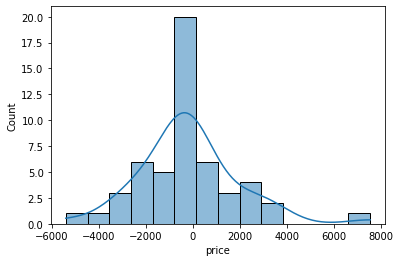

In [293]:
import seaborn as sns

sns.histplot(y_test - pred, kde=True) 

In [294]:
import matplotlib.pyplot as plt

<BarContainer object of 44 artists>

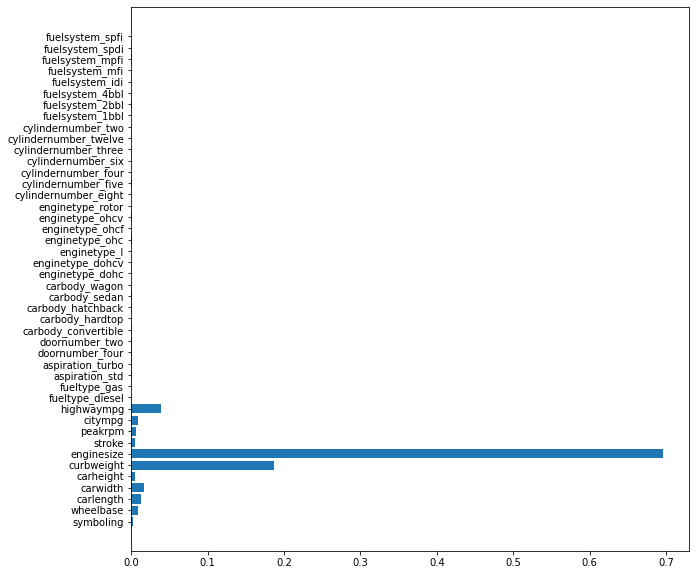

In [295]:
plt.figure(figsize=(10,10))
plt.barh(features1.columns, clf.feature_importances_)

In [296]:
clf2 = SVR(C=45)
clf2.fit(X_train, y_train)

pred = clf2.predict(X_test)
print("Predict: ",pred)

print("mean squeared error: ", mean_squared_error(y_test, pred))


Predict:  [10315.13625846 10122.5574721   9386.2110613  10628.82542715
 10693.69507055 10128.59938188 10608.75262227 10485.11250711
 10093.93145149 10578.30260865 10177.67327623 10218.7720848
 10277.54104177  9680.16382654  9680.56984302 10476.9001731
  9471.51798983 10354.539284   10565.61081801 10125.95775463
 10305.45913557  9375.26692706  9460.10049283  9476.82161398
 10482.84286874  9940.85022034  9499.7534913  10118.52523741
  9503.46602686 10023.18919206  9484.04820012 10537.15174373
 10544.36062807  9500.44952003 10567.3588261  10726.37518564
 10234.81810307 10529.18322528 10282.36401676 10130.3664736
  9482.8468721   9736.06669446  9475.62142513  9396.1796537
 10106.7173958   9373.28523994 10143.0701908  10726.37518564
 10124.23267263  9405.85713106 10477.28008237 10011.73146983]
mean squeared error:  59500481.07559096


In [297]:
clf3 = DecisionTreeRegressor()
clf3.fit(X_train, y_train)

pred = clf3.predict(X_test)
print("Predict: ",pred)

print("mean squeared error: ", mean_squared_error(y_test, pred))

Predict:  [13495.  14489.   6669.  13499.  28248.   8495.  14489.  15250.  11549.
 16503.  16430.  16515.   7975.   6855.   6855.  33278.   9549.   9995.
 16558.  14489.  19045.   6488.   6575.   8845.  16630.   5572.   8916.5
  9980.   7999.   7299.   6692.  17075.  18920.   7299.  16900.  36880.
 12170.  19045.  15985.  11549.   7499.   7775.   6692.   6669.   7775.
  5572.  13950.  36880.   9639.   6229.  21105.   7957. ]
mean squeared error:  5847379.625


<BarContainer object of 44 artists>

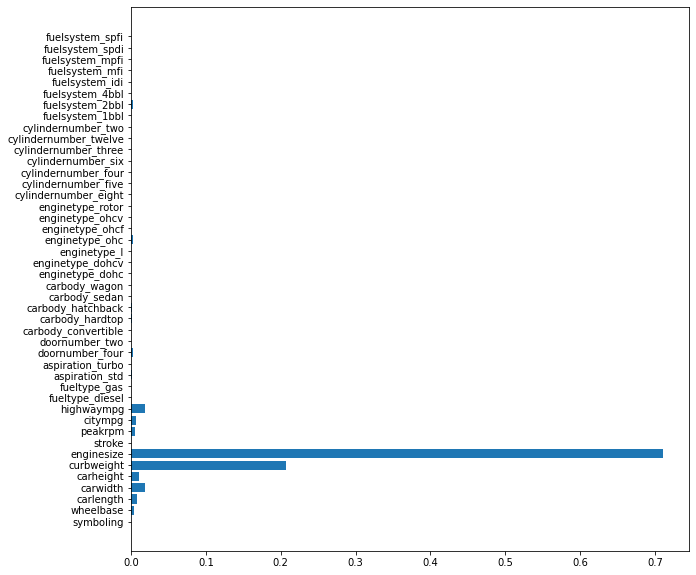

In [300]:
plt.figure(figsize=(10,10))
plt.barh(features1.columns, clf3.feature_importances_)

In [298]:
clf4 = LinearRegression()
clf4.fit(X_train, y_train)

pred = clf4.predict(X_test)
print("Predict: ",pred)

print("mean squeared error: ", mean_squared_error(y_test, pred))

Predict:  [13838.36899811 13615.39970306  6424.35506891 16880.27428663
 33809.27708537 10087.78333485 19894.42554316 17782.54997364
 20544.25059835 22743.89240805 14197.62323388 17955.3472942
  8071.5389586   7205.06235047  7253.49694358 28511.74852334
 10292.07715502  9920.23194764 20551.87748696 13881.78996518
 19191.61949046  5837.60852704  6682.01065983 10300.57604206
 18403.28234626  2388.50721978  6795.30619831 14004.57563898
  5164.2566488   8057.45824578  6274.10337133 15041.58057811
 20839.34898739  6883.09389833 17278.44633803 29910.62126223
 15222.97653356 21719.03786612 18578.42665167 15039.83175594
  6522.48512893  8747.65626937  6505.89467449  7047.52719939
  9613.16199325  5876.95462793 10875.37248158 29910.62126223
 14619.05622827  6096.17375578 21526.28290658  7490.78452808]
mean squeared error:  5977951.29089106


### Hence by considering above model and tuning the parameters, `Random forest Regressor` works best on it

In [303]:
# randomized search CV

# no. of trees in forest
n_estimators = [int(x) for x in np.linspace(start = 100 , stop = 1200, num = 12)]

# no. of features to consider at every split
max_feature = ['auto','sqrt']

#maximum no. of levelsin tree
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]

#minimum no. of sample required to split a node
min_samples_split = [2,5,10,15,100]

#min. no. samples required at each leaf node
min_samples_leaf = [1,2,5,10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_feature,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [304]:
from sklearn.model_selection import RandomizedSearchCV

In [305]:
rf_random = RandomizedSearchCV(estimator= clf, param_distributions= random_grid, scoring='neg_mean_squared_error', n_iter= 10, cv= 5, random_state=42, n_jobs= 1)

In [306]:
rf_random.fit(X_train,y_train)

pred = rf_random.predict(X_test)

mean_squared_error(y_test, pred)


c:\Users\pandy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\pandy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\pandy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

3550994.4044272406